### Importación de datos



In [1]:
import pandas as pd

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



Calcular el ingreso total de cada tienda, sumando los valores de la columna precio de cada conjunto de datos de la tienda para estimar los ingresos.

In [2]:
ingreso_tienda1 = tienda1["Precio"].sum()
ingreso_tienda2 = tienda2["Precio"].sum()
ingreso_tienda3 = tienda3["Precio"].sum()
ingreso_tienda4 = tienda4["Precio"].sum()

print(f"Ingreso total tienda 1: {ingreso_tienda1:,.2f}")
print(f"Ingreso total tienda 2: {ingreso_tienda2:,.2f}")
print(f"Ingreso total tienda 3: {ingreso_tienda3:,.2f}")
print(f"Ingreso total tienda 4: {ingreso_tienda4:,.2f}")

Ingreso total tienda 1: 1,150,880,400.00
Ingreso total tienda 2: 1,116,343,500.00
Ingreso total tienda 3: 1,098,019,600.00
Ingreso total tienda 4: 1,038,375,700.00


Gráfica de barras vertical

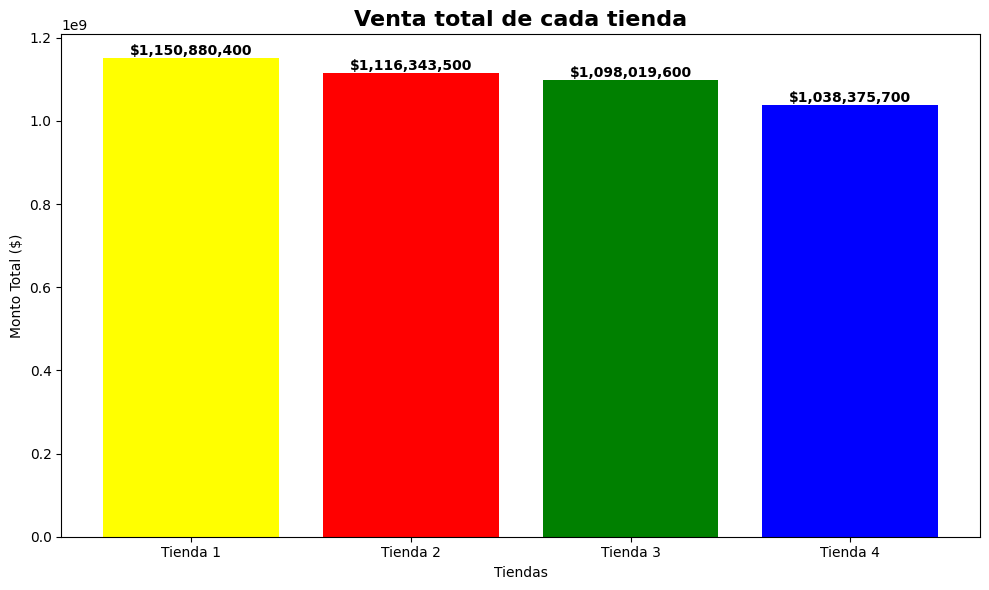

In [3]:
import matplotlib.pyplot as plt

# Listas para la gráfica
tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
ingresos = [ingreso_tienda1, ingreso_tienda2, ingreso_tienda3, ingreso_tienda4]

# Colores
colores = ["yellow", "red", "green", "blue"]

# gráfica
plt.figure(figsize=(10, 6))
barras = plt.bar(tiendas, ingresos, color=colores)

# Mostrar valores encima de cada barra
for barra, valor in zip(barras, ingresos):
    plt.text(
        barra.get_x() + barra.get_width()/2,
        barra.get_height(),
        f"${valor:,.0f}",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

# Títulos
plt.title("Venta total de cada tienda", fontsize=16, fontweight='bold')
plt.xlabel("Tiendas")
plt.ylabel("Monto Total ($)")

plt.tight_layout()
plt.show()

Gráfica de pastel

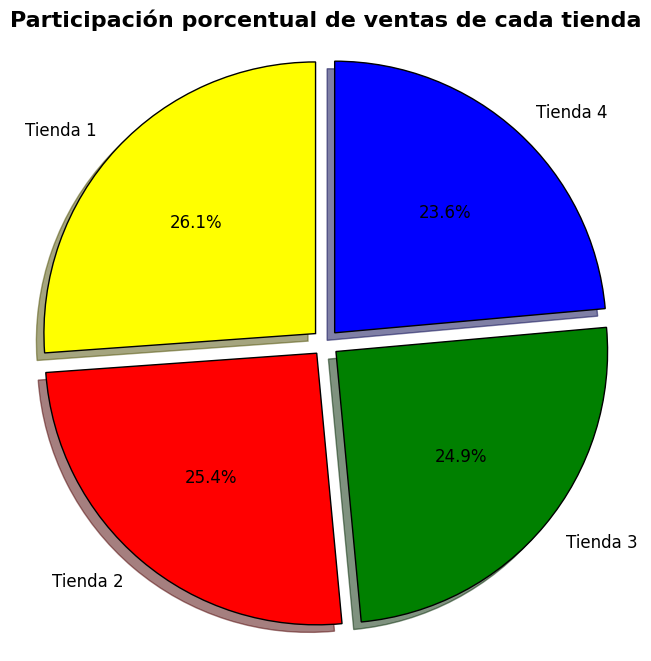

In [4]:
import matplotlib.pyplot as plt

# Definir lista
ingresos = [ingreso_tienda1, ingreso_tienda2, ingreso_tienda3, ingreso_tienda4]
total_ingresos = sum(ingresos)

# Calculo total de ingresos para porcentajes
porcentajes = [(ingreso / total_ingresos) * 100 for ingreso in ingresos]

# Lista para la gráfica
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Colores
colores = ["yellow", "red", "green", "blue"]

# Gráfica
plt.figure(figsize=(8, 8))
plt.pie(
    porcentajes,
    labels=tiendas,
    autopct="%1.1f%%",
    startangle=90,
    explode=[0.05, 0.05, 0.05, 0.05],
    shadow=True,
    colors=colores,
    textprops={"fontsize": 12},
    wedgeprops={'edgecolor': 'black'}
)

plt.title("Participación porcentual de ventas de cada tienda", fontsize=16, fontweight='bold')
plt.axis("equal")
plt.show()

Análisis:

-La tienda con mayor venta es la tienda 1 con un total de: $1,150,880,400.

-La tienda con menor venta es la tienda 4 con un total de: $1,038,375,700.

-La diferencia en ventas entre tienda 1 y tienda 4 es de: $112,504,700.

-La diferencia en ventas de manera porcentual entre tienda 1 y tienda 4 es del: 2,5%.

# 2. Ventas por categoría

calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

In [5]:
from IPython.display import display, HTML

def ventas_por_categoria(df):
    tabla = (
        df.groupby("Categoría del Producto")
        .size()
        .reset_index(name="Cantidad")
        .sort_values("Cantidad", ascending=False)
        .reset_index(drop=True)
    )
    tabla.index = tabla.index + 1
    return tabla

# Crear las tablas
ventas_categoría_tienda1 = ventas_por_categoria(tienda1)
ventas_categoría_tienda2 = ventas_por_categoria(tienda2)
ventas_categoría_tienda3 = ventas_por_categoria(tienda3)
ventas_categoría_tienda4 = ventas_por_categoria(tienda4)

html = f"""
<style>
  .titulo-tienda {{
    text-align: center;
    font-weight: bold;
    font-size: 16px;
    margin-bottom: 8px;
  }}
  table.layout {{
    width: 95%;
    margin: auto;
    border-collapse: collapse;
  }}
  td.celda {{
    width: 48%;
    vertical-align: top;
    padding: 6px;
  }}
  table.dataframe {{
    margin-left: auto;
    margin-right: auto;
    border-collapse: collapse;
    width: 90%;
  }}
  /*Encabezados centrados */
  table.dataframe th {{
    background-color: #f2f2f2;
    text-align: center;
  }}
  /*Datos alineados a la izquierda */
  table.dataframe td {{
    text-align: left;
  }}
  /*Bordes y espaciado */
  table.dataframe td, table.dataframe th {{
    border: 1px solid #ddd;
    padding: 5px;
  }}
  /*Columna del índice más angosta */
  table.dataframe th:first-child,
  table.dataframe td:first-child {{
    width: 5%;
    text-align: center;
  }}
</style>

<table class="layout">
  <tr>
    <td class="celda">
      <div class="titulo-tienda">Tienda 1</div>
      {ventas_categoría_tienda1.to_html(index=True)}
    </td>
    <td class="celda">
      <div class="titulo-tienda">Tienda 2</div>
      {ventas_categoría_tienda2.to_html(index=True)}
    </td>
  </tr>
  <tr>
    <td class="celda">
      <div class="titulo-tienda">Tienda 3</div>
      {ventas_categoría_tienda3.to_html(index=True)}
    </td>
    <td class="celda">
      <div class="titulo-tienda">Tienda 4</div>
      {ventas_categoría_tienda4.to_html(index=True)}
    </td>
  </tr>
</table>
"""

# --- Mostrar tablas HTML ---
display(HTML(html))

,Categoría del Producto,Cantidad
1,Muebles,465
2,Electrónicos,448
3,Juguetes,324
4,Electrodomésticos,312
5,Deportes y diversión,284
6,Instrumentos musicales,182
7,Libros,173
8,Artículos para el hogar,171
,Categoría del Producto,Cantidad
1,Muebles,442


Gráfica de barras horizontal

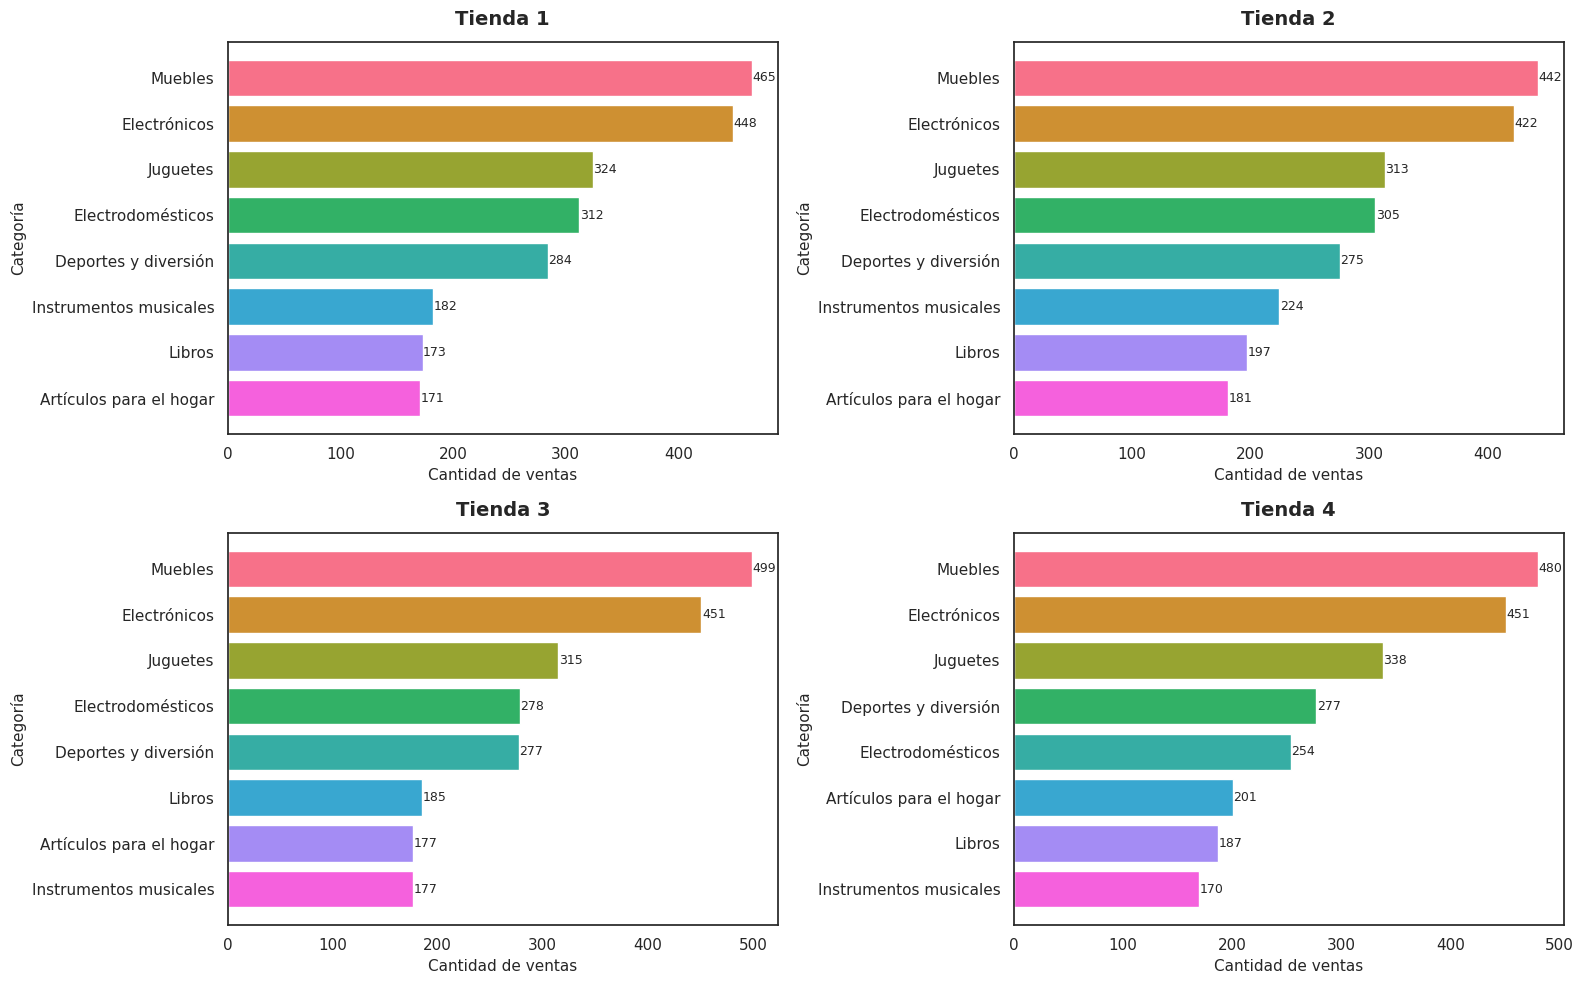

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo sin cuadrícula
sns.set(style="white")

# Lista con los DataFrames y nombres
tiendas = [
    ("Tienda 1", ventas_categoría_tienda1),
    ("Tienda 2", ventas_categoría_tienda2),
    ("Tienda 3", ventas_categoría_tienda3),
    ("Tienda 4", ventas_categoría_tienda4),
]

# Crear figura con subplots (2 filas, 2 columnas)
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

# Graficar cada tienda
for i, (nombre, df) in enumerate(tiendas):
    ax = axes[i]
    colores = sns.color_palette("husl", len(df))

    # Gráfica de barras horizontal
    ax.barh(df["Categoría del Producto"], df["Cantidad"], color=colores)

    # Etiquetas de ejes
    ax.set_xlabel("Cantidad de ventas", fontsize=11)
    ax.set_ylabel("Categoría", fontsize=11)

    # Títulos
    ax.set_title(nombre, fontsize=14, weight="bold", pad=12)

    # Invertir eje Y (más vendido arriba)
    ax.invert_yaxis()

    # Quitar cuadrícula
    ax.grid(False)

    # Mostrar valores al final de las barras
    for j, v in enumerate(df["Cantidad"]):
        ax.text(v + 0.5, j, str(v), va='center', fontsize=9)

# Ajustar espaciado general
plt.tight_layout()
plt.show()

Análisis:

-Las categorías con más ventas entre todas las tiendas son los muebles y los accesorios electrónicos.

-Las categorías con menos ventas entre todas las tiendas son los libros, artículos para el hogar y instrumentos musicales.

# 3. Calificación promedio de la tienda


calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

In [7]:
promedio_tienda1 = tienda1["Calificación"].mean()
promedio_tienda2 = tienda2["Calificación"].mean()
promedio_tienda3 = tienda3["Calificación"].mean()
promedio_tienda4 = tienda4["Calificación"].mean()

print("Promedio tienda 1:", round(promedio_tienda1, 2))
print("Promedio tienda 2:", round(promedio_tienda2, 2))
print("Promedio tienda 3:", round(promedio_tienda3, 2))
print("Promedio tienda 4:", round(promedio_tienda4, 2))

Promedio tienda 1: 3.98
Promedio tienda 2: 4.04
Promedio tienda 3: 4.05
Promedio tienda 4: 4.0


Análisis:

-Todas las tiendas tienen un buen promedio general de satisfacción.

-La diferencia entre la tienda de mejor a peor calificación es de: 0,07 puntos.

# 4. Productos más y menos vendidos

identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.

In [8]:
from IPython.display import display, HTML

def ventas_dataframe(df):
    ventas = df["Producto"].value_counts().reset_index()
    ventas.columns = ["Producto", "Cantidad"]
    ventas = ventas.sort_values(by="Cantidad", ascending=False).reset_index(drop=True)
    ventas.index = ventas.index + 1
    return ventas

ventas_tienda1 = ventas_dataframe(tienda1)
ventas_tienda2 = ventas_dataframe(tienda2)
ventas_tienda3 = ventas_dataframe(tienda3)
ventas_tienda4 = ventas_dataframe(tienda4)

def top_mas_menos(df):
    mas = df.head(5)
    menos = df.tail(5).reset_index(drop=True)
    menos.index = menos.index + 1
    return mas, menos

top1_mas, top1_menos = top_mas_menos(ventas_tienda1)
top2_mas, top2_menos = top_mas_menos(ventas_tienda2)
top3_mas, top3_menos = top_mas_menos(ventas_tienda3)
top4_mas, top4_menos = top_mas_menos(ventas_tienda4)

# --- Estilo HTML ---
html = f"""
<style>
  h2 {{
    text-align: center;
    font-size: 22px;
    margin-top: 20px;
    margin-bottom: 10px;
    color: #2C3E50;
  }}
  .titulo-tienda {{
    text-align: center;
    font-weight: bold;
    font-size: 16px;
    margin-bottom: 8px;
    color: #34495E;
  }}
  table.layout {{
    width: 95%;
    margin: auto;
    border-collapse: collapse;
  }}
  td.celda {{
    width: 48%;
    vertical-align: top;
    padding: 6px;
  }}
  table.dataframe {{
    margin-left: auto;
    margin-right: auto;
    border-collapse: collapse;
    width: 90%;
  }}
  table.dataframe th {{
    background-color: #f2f2f2;
    text-align: center;
  }}
  table.dataframe td {{
    text-align: left;
  }}
  table.dataframe td, table.dataframe th {{
    border: 1px solid #ddd;
    padding: 5px;
  }}
  table.dataframe th:first-child,
  table.dataframe td:first-child {{
    width: 5%;
    text-align: center;
  }}
</style>

<!-- ==================== PRODUCTOS MÁS VENDIDOS ==================== -->
<h2>PRODUCTOS MÁS VENDIDOS</h2>
<table class="layout">
  <tr>
    <td class="celda">
      <div class="titulo-tienda">Tienda 1</div>
      {top1_mas.to_html(index=True)}
    </td>
    <td class="celda">
      <div class="titulo-tienda">Tienda 2</div>
      {top2_mas.to_html(index=True)}
    </td>
  </tr>
  <tr>
    <td class="celda">
      <div class="titulo-tienda">Tienda 3</div>
      {top3_mas.to_html(index=True)}
    </td>
    <td class="celda">
      <div class="titulo-tienda">Tienda 4</div>
      {top4_mas.to_html(index=True)}
    </td>
  </tr>
</table>

<!-- ==================== PRODUCTOS MENOS VENDIDOS ==================== -->
<h2>PRODUCTOS MENOS VENDIDOS</h2>
<table class="layout">
  <tr>
    <td class="celda">
      <div class="titulo-tienda">Tienda 1</div>
      {top1_menos.to_html(index=True)}
    </td>
    <td class="celda">
      <div class="titulo-tienda">Tienda 2</div>
      {top2_menos.to_html(index=True)}
    </td>
  </tr>
  <tr>
    <td class="celda">
      <div class="titulo-tienda">Tienda 3</div>
      {top3_menos.to_html(index=True)}
    </td>
    <td class="celda">
      <div class="titulo-tienda">Tienda 4</div>
      {top4_menos.to_html(index=True)}
    </td>
  </tr>
</table>
"""

# --- Mostrar tablas HTML ---
display(HTML(html))

,Producto,Cantidad
1,Microondas,60
2,TV LED UHD 4K,60
3,Armario,60
4,Secadora de ropa,58
5,Mesa de noche,56
,Producto,Cantidad
1,Iniciando en programación,65
2,Microondas,62
3,Batería,61
4,Guitarra acústica,58


Gráfica de barras horizontal

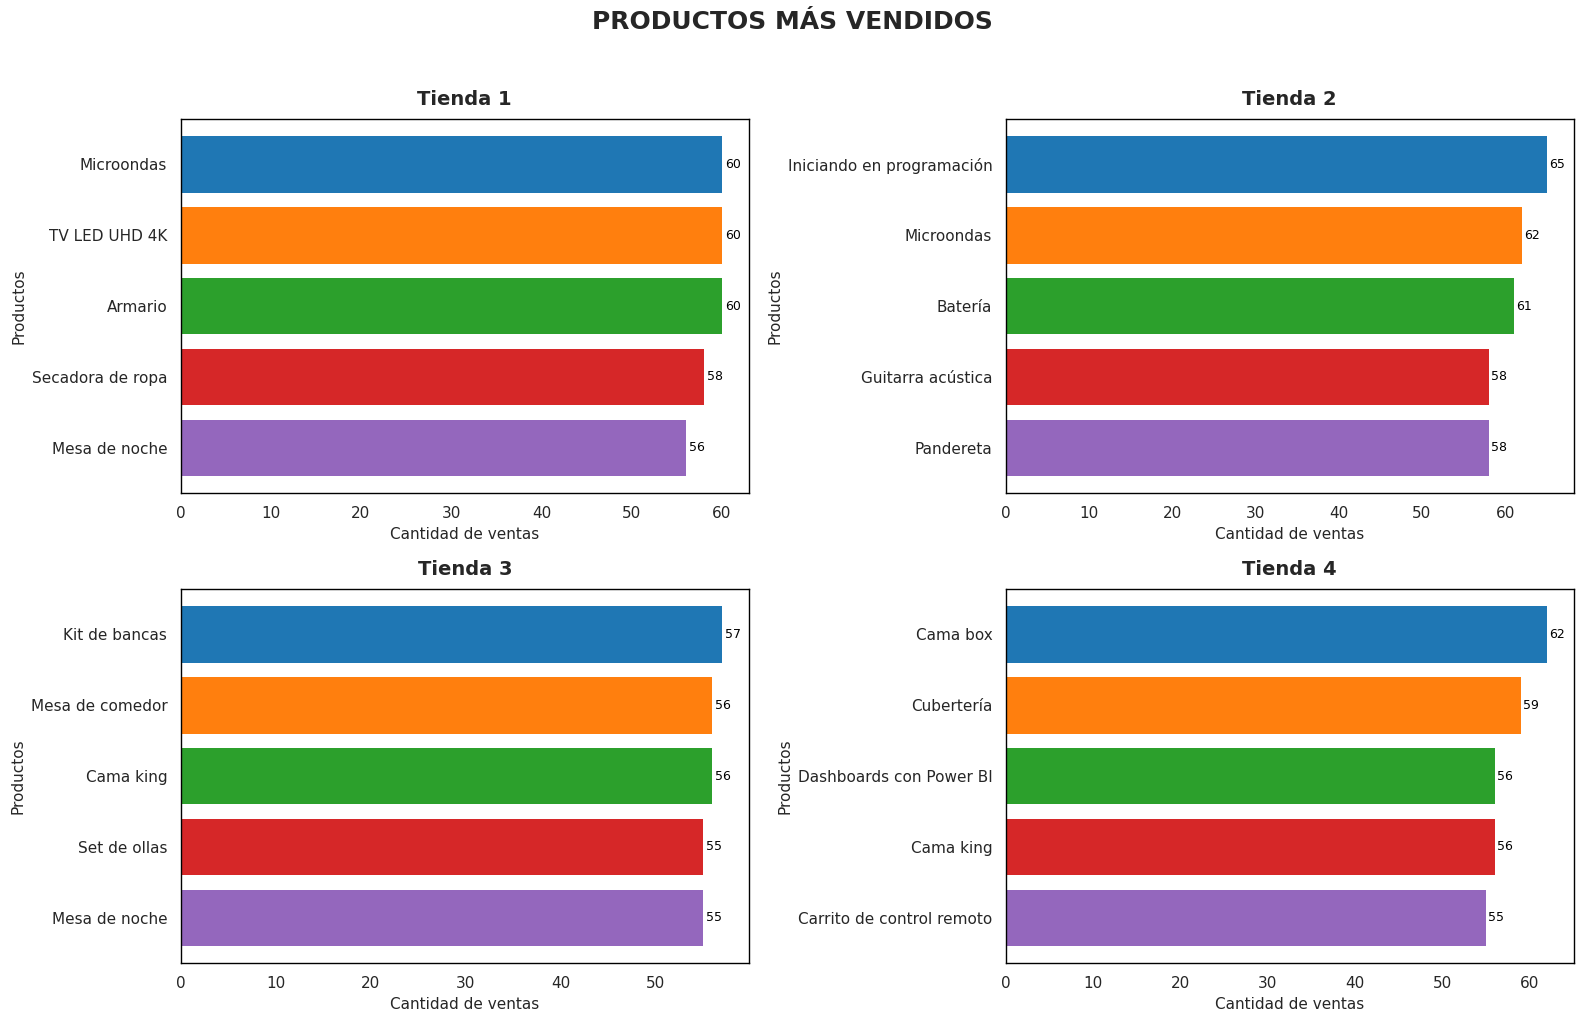

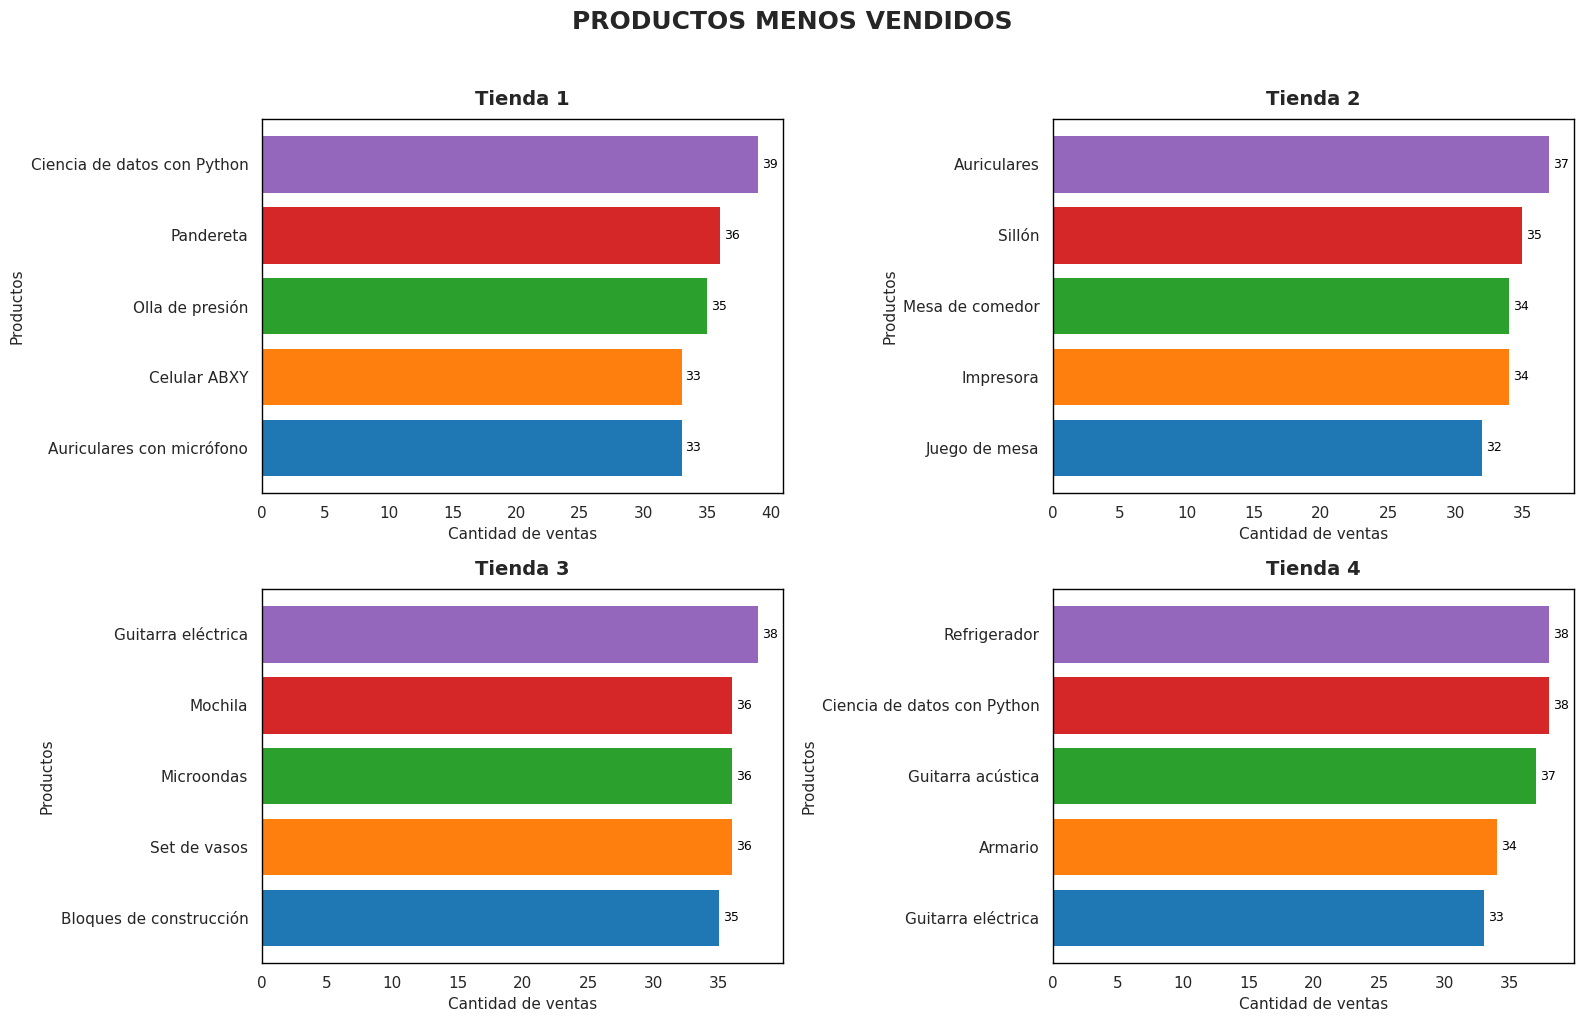

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lista con los DataFrames de ventas y nombres de las tiendas
tientas = [
    ("Tienda 1", ventas_tienda1),
    ("Tienda 2", ventas_tienda2),
    ("Tienda 3", ventas_tienda3),
    ("Tienda 4", ventas_tienda4),
]

def graficar_tiendas(tiendas, tipo="mas"):
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    axes = axes.flatten()

    # Título de los grupos
    titulo = "Productos más vendidos" if tipo == "mas" else "Productos menos vendidos"
    fig.suptitle(titulo.upper(), fontsize=18, weight="bold", y=1.02)

    for i, (nombre, df) in enumerate(tiendas):
        ax = axes[i]

        data = df.head(5) if tipo == "mas" else df.tail(5)
        if tipo == "menos":
            data = data.sort_values(by="Cantidad", ascending=True)

        # Paleta de colores vibrante
        colores = sns.color_palette("tab10", len(data))

        # Gráfico de barras horizontal
        ax.barh(data["Producto"], data["Cantidad"], color=colores, edgecolor="none")

        # Etiquetas de ejes
        ax.set_xlabel("Cantidad de ventas", fontsize=11)
        ax.set_ylabel("Productos", fontsize=11)
        ax.set_title(nombre, fontsize=14, weight="bold", pad=10)
        ax.grid(False)

        for spine in ax.spines.values():
            spine.set_visible(True)
            spine.set_linewidth(1)
            spine.set_color("black")

        # Mostrar cantidad a la derecha de cada barra
        for j, v in enumerate(data["Cantidad"]):
            ax.text(v + 0.3, j, str(v), va="center", fontsize=9, color="black")

        # Invertir eje Y para más vendidos
        if tipo == "mas":
            ax.invert_yaxis()

    # Ajustar diseño
    plt.tight_layout()
    plt.show()

# ----------------------------
# Mostrar gráficas
# ----------------------------
graficar_tiendas(tientas, tipo="mas")
graficar_tiendas(tientas, tipo="menos")

# 5. Envío promedio por tienda

calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.  Sabiendo que el cliente paga el envío.

In [10]:
promedio_envio_tienda1 = tienda1["Costo de envío"].mean()
promedio_envio_tienda2 = tienda2["Costo de envío"].mean()
promedio_envio_tienda3 = tienda3["Costo de envío"].mean()
promedio_envio_tienda4 = tienda4["Costo de envío"].mean()

print(f"Costo de envío promedio tienda 1: {promedio_envio_tienda1:.2f}")
print(f"Costo de envío promedio tienda 2: {promedio_envio_tienda2:.2f}")
print(f"Costo de envío promedio tienda 3: {promedio_envio_tienda3:.2f}")
print(f"Costo de envío promedio tienda 4: {promedio_envio_tienda4:.2f}")

Costo de envío promedio tienda 1: 26018.61
Costo de envío promedio tienda 2: 25216.24
Costo de envío promedio tienda 3: 24805.68
Costo de envío promedio tienda 4: 23459.46


Análisis:

-La tienda con mayor costo de envío promedio es la tienda 1 que es de: 26018.61.

-La tienda con menor costo de envío promedio es la tienda 4 que es de: 23459.46.

#6. Análisis del desempeño geográfico

-Utilice los datos de latitud (lat) y longitud (lon) para mapear las ventas de cada tienda y analizar la distribución geográfica de los productos vendidos.

In [11]:
import plotly.express as px

tienda1["Tienda"] = "Tienda 1"
tienda2["Tienda"] = "Tienda 2"
tienda3["Tienda"] = "Tienda 3"
tienda4["Tienda"] = "Tienda 4"

ventas = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)
ventas['Ingreso'] = ventas['Precio']
ventas = ventas.dropna(subset=["lat", "lon"])
ventas["lat"] = ventas["lat"].astype(float)
ventas["lon"] = ventas["lon"].astype(float)

colores_tiendas = {
    "Tienda 1": "red",
    "Tienda 2": "blue",
    "Tienda 3": "yellow",
    "Tienda 4": "purple"
}

fig = px.scatter_mapbox(
    ventas,
    lat="lat",
    lon="lon",
    color="Tienda",
    size="Ingreso",
    color_discrete_map=colores_tiendas,
    hover_name="Producto",
    hover_data={"Ingreso": True, "Calificación": True},
    mapbox_style="open-street-map",
    zoom=4.2,
    center={"lat": 4.0, "lon": -74.0},
    title="Distribución geográfica de las ventas por tienda de forma global"
)

fig.update_layout(
    dragmode="zoom",  # permite acercar arrastrando
    hovermode="closest",
    margin=dict(l=0, r=0, t=40, b=0)
)

#Mostrar mapa interactivo con zoom y scroll
fig.show(config={"scrollZoom": True})

In [12]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

tienda1["Tienda"] = "Tienda 1"
tienda2["Tienda"] = "Tienda 2"
tienda3["Tienda"] = "Tienda 3"
tienda4["Tienda"] = "Tienda 4"

for df in [tienda1, tienda2, tienda3, tienda4]:
    df["Ingreso"] = df["Precio"]
    df.dropna(subset=["lat", "lon"], inplace=True)
    df["lat"] = df["lat"].astype(float)
    df["lon"] = df["lon"].astype(float)

#Colores
colores = {
    "Tienda 1": "red",
    "Tienda 2": "blue",
    "Tienda 3": "yellow",
    "Tienda 4": "purple"
}

#Crear figura
fig = make_subplots(
    rows=4, cols=1,
    subplot_titles=("Mapa Tienda 1", "Mapa Tienda 2", "Mapa Tienda 3", "Mapa Tienda 4"),
    specs=[[{"type": "mapbox"}]] * 4,
    vertical_spacing=0.02
)

#Agregar datos
tiendas = [tienda1, tienda2, tienda3, tienda4]
for i, t in enumerate(tiendas, start=1):
    fig.add_trace(
        go.Scattermapbox(
            lat=t["lat"],
            lon=t["lon"],
            mode="markers",
            marker=dict(
                size=(t["Ingreso"] / t["Ingreso"].max()) * 25,
                color=colores[t["Tienda"].iloc[0]],
                opacity=0.8
            ),
            customdata=t[["Producto", "Ingreso", "Calificación", "Tienda"]],
            hovertemplate=(
                "<b>%{customdata[0]}</b><br><br>" +
                "Tienda=%{customdata[3]}<br>" +
                "Ingreso=%{customdata[1]:,.0f}<br>" +
                "lat=%{lat}<br>" +
                "lon=%{lon}<br>" +
                "Calificación=%{customdata[2]}<extra></extra>"
            ),
            name=t["Tienda"].iloc[0]
        ),
        row=i, col=1
    )

#Configurar mapas
for i in range(1, 5):
    fig.update_mapboxes(
        dict(
            style="open-street-map",
            center=dict(lat=4.0, lon=-74.0),
            zoom=4.2
        ),
        row=i, col=1
    )

#Layout
fig.update_layout(
    title="Distribución geográfica de las ventas por tienda, (Se muestra las tiendas en cada mapa de forma independiente)",
    height=2000,
    showlegend=False,
    margin=dict(l=0, r=0, t=60, b=0)
)

#Mostrar mapa interactivo con zoom y scroll
fig.show(config={"scrollZoom": True})

-Genere mapas de calor (Heatmaps) para visualizar datos e identificar áreas con la mayor concentración de ventas.

In [14]:
import folium
from folium.plugins import HeatMap

ventas = pd.concat([tienda1, tienda2, tienda3, tienda4])
ventas = ventas.dropna(subset=["lat", "lon"])

ventas["Ingreso"] = ventas["Precio"]

mapa = folium.Map(location=[ventas["lat"].mean(), ventas["lon"].mean()], zoom_start=5)

gradiente_mapa = {
    0.00: '#0015ff',  # azul profundo
    0.20: '#0099ff',  # celeste brillante
    0.40: '#00ff6e',  # verde intenso
    0.60: '#f7ff00',  # amarillo luminoso
    0.80: '#ffa600',  # naranja fuerte
    1.00: '#ff0000'   # rojo vivo
}

HeatMap(
    data=ventas[["lat", "lon", "Ingreso"]].values,
    radius=13,       # puntos definidos sin perder suavidad
    blur=9,          # transiciones suaves
    max_zoom=5,
    gradient=gradiente_mapa,
    min_opacity=0.55, # más presencia del color base
    max_opacity=0.95  # brillo central intenso
).add_to(mapa)

mapa

-Explore si algunas tiendas tienen un rendimiento superior o inferior al esperado en determinadas regiones e identifique si existen patrones geográficos que puedan influir en el rendimiento de las tiendas.

In [69]:
tienda1["Tienda"] = "Tienda 1"
tienda2["Tienda"] = "Tienda 2"
tienda3["Tienda"] = "Tienda 3"
tienda4["Tienda"] = "Tienda 4"

ventas = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

ventas["Ingreso"] = ventas["Precio"]
ventas = ventas.dropna(subset=["lat", "lon"])
ventas["lat"] = ventas["lat"].astype(float)
ventas["lon"] = ventas["lon"].astype(float)

zona_stats = (
    ventas.groupby(["lat", "lon"])
    .agg({
        "Ingreso": "mean",
        "Calificación": "mean"
    })
    .reset_index()
)

zona_stats["Rendimiento"] = zona_stats["Ingreso"] * 0.7 + zona_stats["Calificación"] * 0.3

fig = px.scatter_mapbox(
    zona_stats,
    lat="lat",
    lon="lon",
    size="Ingreso",
    color="Rendimiento",
    color_continuous_scale="YlOrRd",  # Escala cálida
    mapbox_style="open-street-map",
    zoom=4.2,
    center={"lat": 4.0, "lon": -74.0},
    title="Rendimiento geográfico promedio de las tiendas",
    hover_data={},
)


fig.update_traces(hovertemplate=None)
fig.update_layout(
    hovermode=False,
    margin=dict(l=0, r=0, t=40, b=0),
    coloraxis_colorbar=dict(
        title="Rendimiento",
        tickvals=[zona_stats["Rendimiento"].min(), zona_stats["Rendimiento"].max()],
        ticktext=["Bajo", "Alto"]
    )
)

#Mostrar mapa interactivo con zoom y scroll
fig.show(config={"scrollZoom": True})

-Efectúe un gráfico en donde observe el comportamiento de las ventas totales mensuales de cada tienda.

In [70]:
import plotly.express as px
import plotly.graph_objects as go

# --- Preparación y Consolidación de Datos ---

# Función para preparar cada DataFrame
def preparar_df(df, nombre_tienda):
    df['Fecha de Compra'] = pd.to_datetime(df['Fecha de Compra'], dayfirst=True, errors='coerce')
    df['total_venta'] = df['Precio']

    # Crear una columna para el mes/año (para agrupar) en formato YYYY-MM
    df['mes_venta'] = df['Fecha de Compra'].dt.strftime('%Y-%m')

    # Agregar la columna de la tienda
    df['tienda'] = nombre_tienda
    return df[['mes_venta', 'total_venta', 'tienda']]

# Aplicar la función a todos los DataFrames
df_t1 = preparar_df(tienda1, 'Tienda 1')
df_t2 = preparar_df(tienda2, 'Tienda 2')
df_t3 = preparar_df(tienda3, 'Tienda 3')
df_t4 = preparar_df(tienda4, 'Tienda 4')

# Concatenar todos los DataFrames
df_consolidado = pd.concat([df_t1, df_t2, df_t3, df_t4], ignore_index=True)

# Agrupar por mes para obtener el total de ventas mensual
df_ventas_mensuales = df_consolidado.groupby(['mes_venta', 'tienda'])['total_venta'].sum().reset_index()

# --- Creación del Gráfico con Plotly Express ---

# Definir el mapeo de colores
color_map = {
    'Tienda 1': 'yellow',
    'Tienda 2': 'red',
    'Tienda 3': 'green',
    'Tienda 4': 'blue'
}

# Crear el gráfico lineal con Plotly Express
fig = px.line(
    df_ventas_mensuales,
    x='mes_venta',
    y='total_venta',
    color='tienda',
    title='Comportamiento de las ventas totales mensuales en cada tienda',
    color_discrete_map=color_map, # Aplicar los colores definidos
    markers=True, # Mostrar puntos en la línea
)

# --- Personalización del Gráfico ---

fig.update_xaxes(
    title_text='Fecha',
    tickformat='%Y-%m',
    type='category'
)

fig.update_yaxes(
    title_text='Venta total mensual',
    tickprefix='$',
    tickformat=',.0f'
)

fig.update_layout(
    title={
        'text': 'Comportamiento de las ventas totales mensuales en cada tienda',
        'y': 0.9, # Posición Y del título
        'x': 0.5, # Posición X del título
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

fig.update_traces(
    mode='lines+markers',
    hovertemplate="<br><b>Tienda:</b> %{customdata[0]}<br><b>Mes:</b> %{x}<br><b>Venta total mensual:</b> $%{y:,.0f}<extra></extra>"
)

# Asignar la información de la tienda como customdata para el hover
for data in fig.data:
    tienda_nombre = data['name']
    data.customdata = df_ventas_mensuales[df_ventas_mensuales['tienda'] == tienda_nombre][['tienda']].values

# **Mostrar el gráfico**
fig.show()

Conclusión:

Se le recomienda al señor Juan vender la tienda 4 para iniciar su nuevo emprendimiento ya que es la menos eficiente y últimamente está cayendo en ventas.

